### Linear Regression

##### Importing Packages

In [173]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [174]:
import statsmodels.api as sm

In [227]:
from statsmodels.stats.outliers_influence import variance_inflation_factor as VIF
from statsmodels.stats.anova import anova_lm

In [176]:
from ISLP import load_data
from ISLP.models import (ModelSpec as MS, summarize, poly)

In [177]:
#dir()

In [178]:
A = np.array([3, 5, 11])
#dir(A)

In [179]:
A.sum()

19

### Simple Linear Regression

In [180]:
Boston = load_data("Boston")
Boston.columns

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat', 'medv'],
      dtype='object')

In [181]:
#Boston?

In [182]:
Boston.shape

(506, 13)

In [183]:
, Boston.shape[0]

'Boston.shape[0]'

In [184]:
X = pd.DataFrame({'intercept' : np.ones(Boston.shape[0]), 'lstat' : Boston['lstat'] })
X[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [185]:
y = Boston['medv']
model = sm.OLS(y, X)
results = model.fit()

In [186]:
summarize(results)

,coef,std err,t,P>|t|
intercept,34.5538,0.563,61.415,0.0
lstat,-0.9500,0.039,-24.528,0.0


##### Using Transformations: Fit and Transform

In [187]:
design = MS(['lstat'])
design = design.fit(Boston)
x = design.transform(Boston)
x[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [188]:
design = MS(['lstat'])
x = design.fit_transform(Boston)
x[:4]

,intercept,lstat
0,1.0,4.98
1,1.0,9.14
2,1.0,4.03
3,1.0,2.94


In [189]:
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   medv   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     601.6
Date:                Fri, 13 Oct 2023   Prob (F-statistic):           5.08e-88
Time:                        19:12:30   Log-Likelihood:                -1641.5
No. Observations:                 506   AIC:                             3287.
Df Residuals:                     504   BIC:                             3295.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     34.5538      0.563     61.415      0.000      33.448      35.659
lstat         -0.9500      0.039    -24.528      0.000      -1.026      -0.874
==============================================================================
Omnibus:                      137.043   Durbin-Watson:                   0.892
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              291.373
Skew:                           1.453   Prob(JB):                     5.36e-64
Kurtosis:                       5.319   Cond. No.                         29.7
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [190]:
# Retrieve the coefficients
results.params

intercept    34.553841
lstat        -0.950049
dtype: float64

In [191]:
new_df = pd.DataFrame({'lstat':[5, 10, 15]})
newX = design.transform(new_df)
newX

,intercept,lstat
0,1.0,5
1,1.0,10
2,1.0,15


In [192]:
new_predictions = results.get_prediction(newX)
new_predictions.predicted_mean

array([29.80359411, 25.05334734, 20.30310057])

In [193]:
# Produce confidence Intervals
new_predictions.conf_int(alpha=0.05)

array([[29.00741194, 30.59977628],
       [24.47413202, 25.63256267],
       [19.73158815, 20.87461299]])

In [194]:
# Produce Prediction Intervals
new_predictions.conf_int(obs=True, alpha=0.05)

array([[17.56567478, 42.04151344],
       [12.82762635, 37.27906833],
       [ 8.0777421 , 32.52845905]])

##### Defining Function

In [195]:
def abline(ax, b, m):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m * xlim[0] + b, m * xlim[1] + b]
    ax.plot(xlim, ylim)

In [196]:
def abline(ax, b, m, *args, **kwargs):
    "Add a line with slope m and intercept b to ax"
    xlim = ax.get_xlim()
    ylim = [m*xlim[0]+b, m*xlim[1]+b]
    ax.plot(xlim, ylim, *args, **kwargs)

In [197]:
results.params, results.params[1]

(intercept    34.553841
 lstat        -0.950049
 dtype: float64,
 -0.9500493537579907)

In [198]:
xlim = ax.get_xlim()
xlim


(0.0, 1.0)

In [199]:
#-0.950049 * xlim[0] + 34.553841
#-0.950049 * -2.0752 + 34.553841

In [200]:
#-0.950049 * xlim[1] + 34.553841
#-0.950049 * 41.7752 + 34.553841

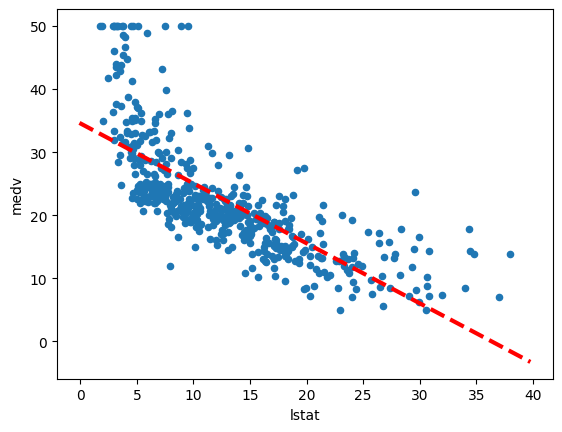

In [201]:
ax = Boston.plot.scatter('lstat', 'medv')
abline(ax, results.params[0], results.params[1], 'r--', linewidth=3)

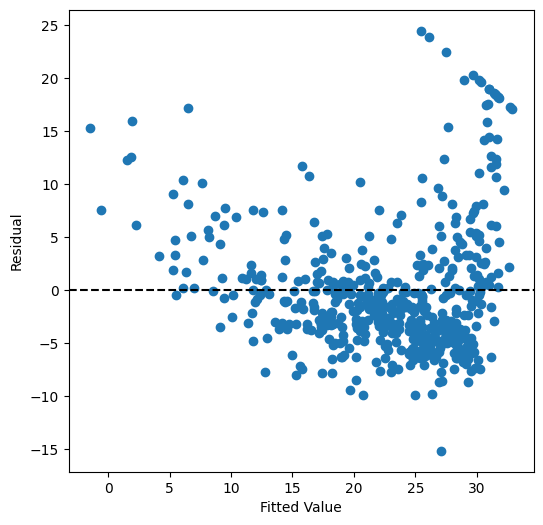

In [202]:
fig, ax = plt.subplots(figsize=(6,6))
ax.scatter(results.fittedvalues, results.resid)
ax.set_xlabel('Fitted Value')
ax.set_ylabel('Residual')
ax.axhline(0, c='k', ls='--');

In [203]:
inf1 = results.get_influence()
inf1

374

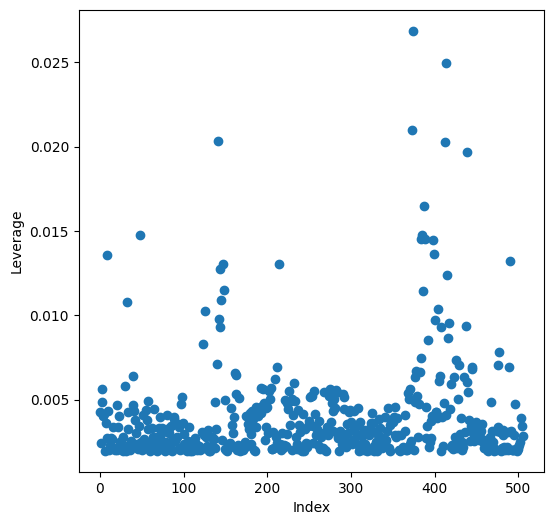

In [204]:
from matplotlib.pyplot import subplots
inf1 = results.get_influence()
#fig, ax = plt.subplots(figsize=(6,6))
ax = subplots(figsize=(6,6))[1]
ax.scatter(np.arange(X.shape[0]), inf1.hat_matrix_diag)
ax.set_xlabel('Index')
ax.set_ylabel('Leverage')
np.argmax(inf1.hat_matrix_diag)

#### Multiple Linear Regression

In [205]:
X = MS(['lstat', 'age']).fit_transform(Boston)
model1 = sm.OLS(y, X)
results1 = model1.fit()
summarize(results1)

,coef,std err,t,P>|t|
intercept,33.2228,0.731,45.458,0.000
lstat,-1.0321,0.048,-21.416,0.000
age,0.0345,0.012,2.826,0.005


In [206]:
terms = Boston.columns.drop("medv")
terms

Index(['crim', 'zn', 'indus', 'chas', 'nox', 'rm', 'age', 'dis', 'rad', 'tax',
       'ptratio', 'lstat'],
      dtype='object')

In [211]:
X = MS(terms).fit_transform(Boston)
model = sm.OLS(y, X)
results = model.fit()
summarize(results)

,coef,std err,t,P>|t|
intercept,41.6173,4.936,8.431,0.000
crim,-0.1214,0.033,-3.678,0.000
zn,0.0470,0.014,3.384,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8400,0.870,3.264,0.001
nox,-18.7580,3.851,-4.870,0.000
rm,3.6581,0.420,8.705,0.000
age,0.0036,0.013,0.271,0.787
dis,-1.4908,0.202,-7.394,0.000
rad,0.2894,0.067,4.325,0.000


In [214]:
terms_1 = Boston.columns.drop(['medv', 'age'])
X = MS(terms_1).fit_transform(Boston)
model2 = sm.OLS(y, X)
summarize(model2.fit())

,coef,std err,t,P>|t|
intercept,41.5251,4.920,8.441,0.000
crim,-0.1214,0.033,-3.683,0.000
zn,0.0465,0.014,3.379,0.001
indus,0.0135,0.062,0.217,0.829
chas,2.8528,0.868,3.287,0.001
nox,-18.4851,3.714,-4.978,0.000
rm,3.6811,0.411,8.951,0.000
dis,-1.5068,0.193,-7.825,0.000
rad,0.2879,0.067,4.322,0.000
tax,-0.0127,0.004,-3.333,0.001


In [219]:
#dir(results)

In [216]:
results.rsquared

0.7343070437613076

In [222]:
np.sqrt(results.scale)

4.798034335596367

In [223]:
X.shape

(506, 12)

In [237]:
vals = [VIF(X, i) for i in range (1, X.shape[1])]
vif = pd.DataFrame({'vif':vals}, index=X.columns[1:])
vif

,vif
crim,1.767455
zn,2.265259
indus,3.987176
chas,1.068018
nox,4.070020
rm,1.834792
dis,3.613722
rad,7.396707
tax,8.994939
ptratio,1.785403


In [258]:
# vals = []
# for i in range(1, X.shape[1]):
#     vals.append(VIF(X, i))
# vif = pd.DataFrame({'vif' : vals}, index = X.columns[1:])
# vif

#### Interaction Terms

In [260]:
X = MS(['lstat', 'age', ('lstat', 'age')]).fit_transform(Boston)
model3 = sm.OLS(y, X)
summarize(model3.fit())

,coef,std err,t,P>|t|
intercept,36.0885,1.470,24.553,0.000
lstat,-1.3921,0.167,-8.313,0.000
age,-0.0007,0.020,-0.036,0.971
lstat:age,0.0042,0.002,2.244,0.025


#### Non-linear Transformations of the predictors

In [265]:
X = MS([poly('lstat', degree=2), 'age']).fit_transform(Boston)
model4 = sm.OLS(y, X)
results3 = model4.fit()
summarize(results3)

,coef,std err,t,P>|t|
intercept,17.7151,0.781,22.681,0.0
"poly(lstat, degree=2)[0]",-179.2279,6.733,-26.620,0.0
"poly(lstat, degree=2)[1]",72.9908,5.482,13.315,0.0
age,0.0703,0.011,6.471,0.0


In [266]:
anova_lm(results1, results3)

,df_resid,ssr,df_diff,ss_diff,F,Pr(>F)
0,503.0,19168.128609,0.0,NaN,NaN,NaN
1,502.0,14165.613251,1.0,5002.515357,177.278785,7.468491e-35


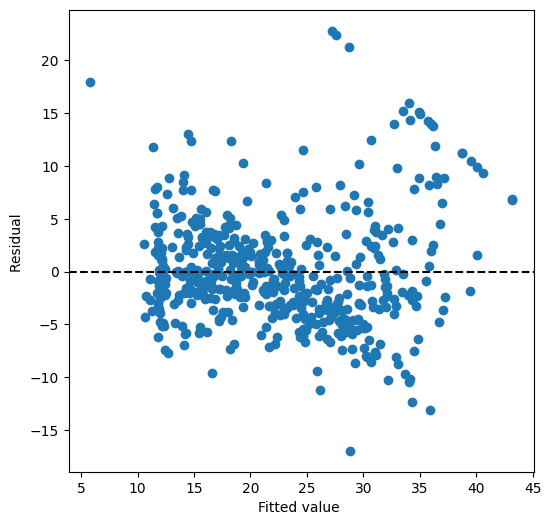

In [269]:
ax = subplots(figsize =(6 ,6))[1]
ax.scatter(results3.fittedvalues , results3.resid)
ax.set_xlabel('Fitted value ')
ax.set_ylabel('Residual ')
ax.axhline(0, c='k', ls='--');

#### Qualitative Predictors

In [275]:
Carseats = load_data('Carseats')
Carseats.columns

Index(['Sales', 'CompPrice', 'Income', 'Advertising', 'Population', 'Price',
       'ShelveLoc', 'Age', 'Education', 'Urban', 'US'],
      dtype='object')

In [283]:
allvars = list(Carseats.columns.drop('Sales'))
y = Carseats['Sales']
final = allvars + [('Income', 'Advertising'),
('Price', 'Age')]
X = MS(final).fit_transform(Carseats)
model = sm.OLS(y, X)
summarize(model.fit())

,coef,std err,t,P>|t|
intercept,6.5756,1.009,6.519,0.000
CompPrice,0.0929,0.004,22.567,0.000
Income,0.0109,0.003,4.183,0.000
Advertising,0.0702,0.023,3.107,0.002
Population,0.0002,0.000,0.433,0.665
Price,-0.1008,0.007,-13.549,0.000
ShelveLoc[Good],4.8487,0.153,31.724,0.000
ShelveLoc[Medium],1.9533,0.126,15.531,0.000
Age,-0.0579,0.016,-3.633,0.000
Education,-0.0209,0.020,-1.063,0.288
